# Random Forest Classifier using IRIS Dataset

In [1]:
import pandas as pd
df = pd.read_csv("data/IRIS.csv")

In [2]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [5]:
df["species"]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [6]:
df["species"].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

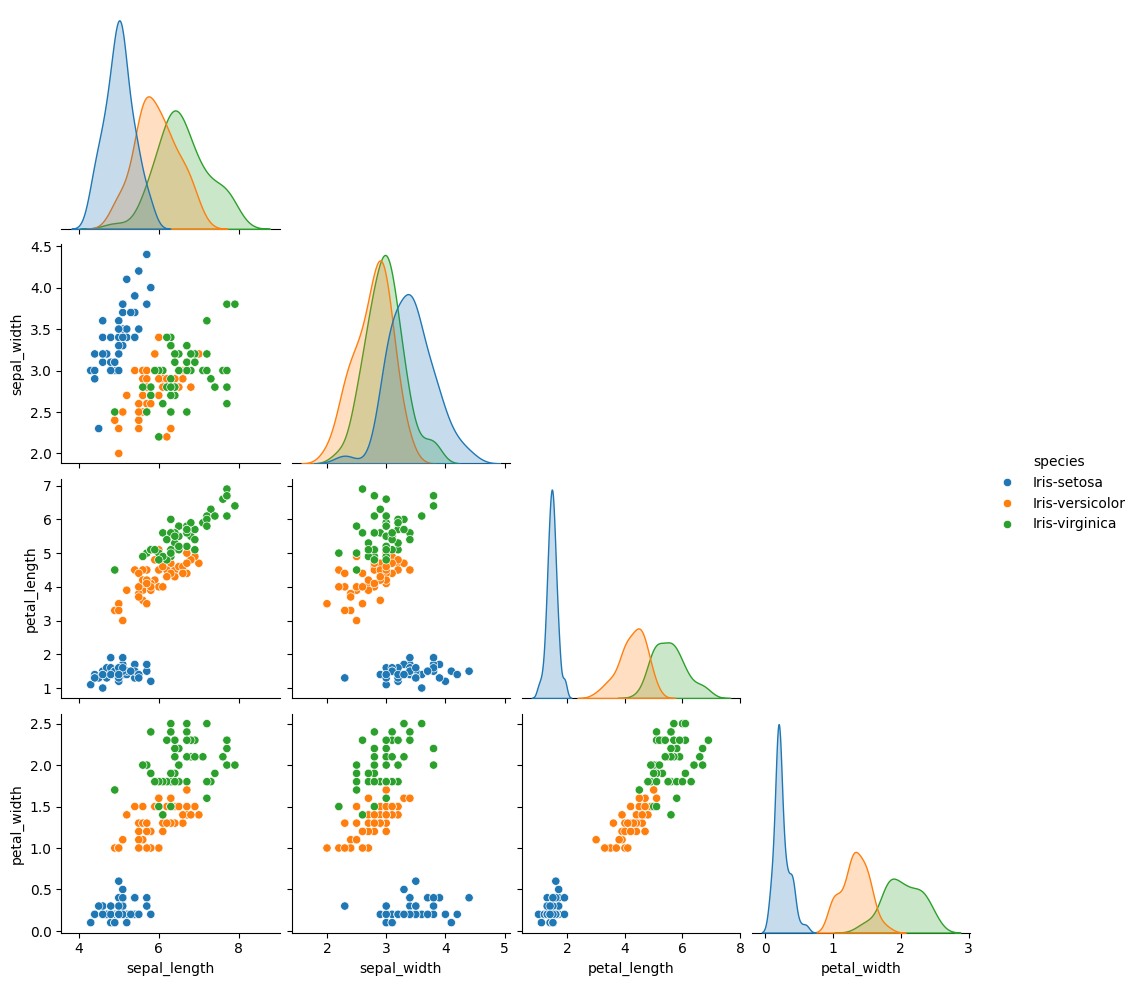

In [8]:
import seaborn as sns

sns.pairplot(df, corner=True, hue="species")

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X,y = df.drop(columns=["species"]), df["species"]   
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state=42)  

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred[:10]

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor'], dtype=object)

In [10]:
y_test[:10]

73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
31         Iris-setosa
64     Iris-versicolor
141     Iris-virginica
68     Iris-versicolor
82     Iris-versicolor
Name: species, dtype: object

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        29
Iris-versicolor       0.96      1.00      0.98        23
 Iris-virginica       1.00      0.96      0.98        23

       accuracy                           0.99        75
      macro avg       0.99      0.99      0.99        75
   weighted avg       0.99      0.99      0.99        75



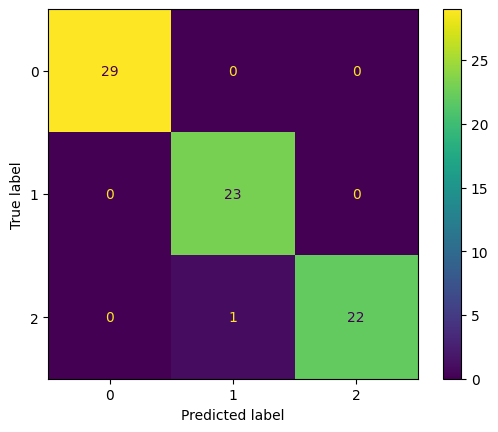

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

## Train on all the data

- satisfied with the model
- train with all data
- export model

In [15]:
import joblib
clf.fit(X,y)
joblib.dump(clf, "models/iris_model.joblib",compress=('xz',3),protocol=5)



['models/iris_model.joblib']

In [20]:
clf=joblib.load("models/iris_model.joblib")

sample_test_Data = pd.DataFrame(X_test.iloc[0]).T

sample_test_Data

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2


In [21]:
X_test

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
...,...,...,...,...
113,5.7,2.5,5.0,2.0
33,5.5,4.2,1.4,0.2
138,6.0,3.0,4.8,1.8
101,5.8,2.7,5.1,1.9


In [19]:
y_test.iloc[0]

'Iris-versicolor'

In [22]:
clf.predict(sample_test_Data)

array(['Iris-versicolor'], dtype=object)

In [2]:
import httpx
url = "http://127.0.0.1:8000/api/iris/v1/predict"
payload = {"sepal_length": 5, "sepal_width": 4.5, "petal_length": 1.8, "petal_width": 0.2}
with httpx.Client() as client:
    response = client.post(url, json=payload)
    response.raise_for_status()
    
    print(response.json())

{'predicted_flower': 'Iris-setosa'}
